In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [3]:
df_euribor = pd.read_csv('../data/final_data/idealista_euribor_monthly_until_june_2023.csv', encoding='utf-8-sig')

In [153]:
df_euribor

,Año,Mes,Valor,Fecha
0,2023,Junio,3.901,2023-06-01
1,2023,Enero,3.337,2023-01-01
2,2022,Diciembre,3.018,2022-12-01
3,2022,Noviembre,2.828,2022-11-01
4,2022,Octubre,2.629,2022-10-01
...,...,...,...,...
285,1999,Mayo,2.683,1999-05-01
286,1999,Abril,2.756,1999-04-01
287,1999,Marzo,3.046,1999-03-01
288,1999,Febrero,3.030,1999-02-01


In [4]:
df_euribor.index = pd.DatetimeIndex(df_euribor["Fecha"])

In [5]:
df_euribor.Fecha

Fecha
2023-06-01    2023-06-01
2023-01-01    2023-01-01
2022-12-01    2022-12-01
2022-11-01    2022-11-01
2022-10-01    2022-10-01
                 ...    
1999-05-01    1999-05-01
1999-04-01    1999-04-01
1999-03-01    1999-03-01
1999-02-01    1999-02-01
1999-01-01    1999-01-01
Name: Fecha, Length: 290, dtype: object

In [6]:
df_euribor.Fecha = pd.to_datetime(df_euribor.Fecha).dt.normalize()
df_euribor.Fecha

Fecha
2023-06-01   2023-06-01
2023-01-01   2023-01-01
2022-12-01   2022-12-01
2022-11-01   2022-11-01
2022-10-01   2022-10-01
                ...    
1999-05-01   1999-05-01
1999-04-01   1999-04-01
1999-03-01   1999-03-01
1999-02-01   1999-02-01
1999-01-01   1999-01-01
Name: Fecha, Length: 290, dtype: datetime64[ns]

In [7]:
df_euribor.Fecha.asfreq('m')

Fecha
1999-01-31   NaT
1999-02-28   NaT
1999-03-31   NaT
1999-04-30   NaT
1999-05-31   NaT
              ..
2023-01-31   NaT
2023-02-28   NaT
2023-03-31   NaT
2023-04-30   NaT
2023-05-31   NaT
Freq: M, Name: Fecha, Length: 293, dtype: datetime64[ns]

In [20]:
decomp = sm.tsa.seasonal_decompose(df_euribor['Valor'],model = 'additive', extrapolate_trend='freq')
decomp.plot();

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

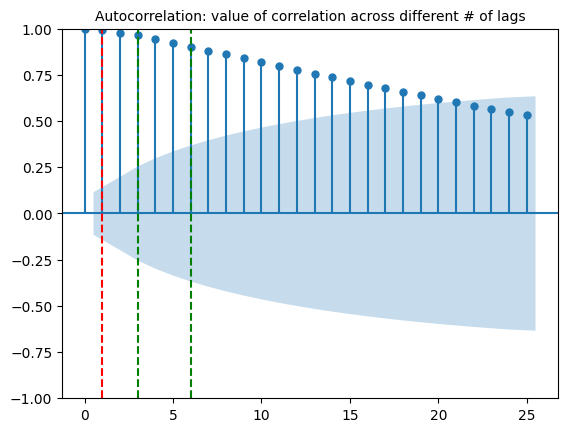

In [21]:
plot_acf(df_euribor['Valor']);
plt.title("Autocorrelation: value of correlation across different # of lags", size=10)
plt.axvline(x=1, c="r", linestyle="--")
plt.axvline(x=3, c="g", linestyle="--")
plt.axvline(x=6, c="g", linestyle="--")

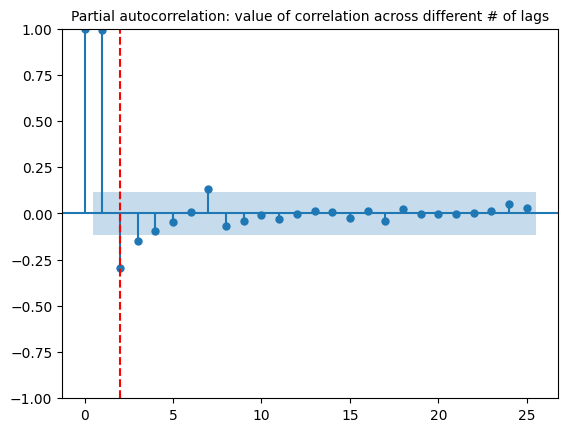

In [22]:
plot_pacf(df_euribor['Valor'])
plt.title("Partial autocorrelation: value of correlation across different # of lags", size=10)
plt.axvline(x=2, c="r", linestyle="--");

In [23]:
# Make sure the "date" column is of type datetime
df_euribor['Fecha'] = pd.to_datetime(df_euribor['Fecha'])
df_euribor.set_index('Fecha', inplace=True)
df_euribor.sort_index(inplace=True)

# Fit the ARIMA model
model = ARIMA(df_euribor['Valor'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the future 12 months
forecast = model_fit.forecast(steps=12)

# Print the predicted values for the next 12 months
print(forecast)

290    4.285487
291    4.564369
292    4.766652
293    4.913375
294    5.019799
295    5.096993
296    5.152984
297    5.193596
298    5.223054
299    5.244420
300    5.259918
301    5.271160
Name: predicted_mean, dtype: float64


C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

In [24]:
# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=df_euribor.index[-1], periods=13, freq='M')[1:]  # Generate 12 upcoming months
forecast_df = pd.DataFrame({'Fecha': forecast_dates, 'Valor': forecast})

In [25]:
forecast_df

,Fecha,Valor
290,2023-07-31,4.285487
291,2023-08-31,4.564369
292,2023-09-30,4.766652
293,2023-10-31,4.913375
294,2023-11-30,5.019799
295,2023-12-31,5.096993
296,2024-01-31,5.152984
297,2024-02-29,5.193596
298,2024-03-31,5.223054
299,2024-04-30,5.244420


In [26]:
forecast_df.set_index('Fecha', inplace=True)

In [27]:
forecast_df

,Valor
Fecha,
2023-07-31,4.285487
2023-08-31,4.564369
2023-09-30,4.766652
2023-10-31,4.913375
2023-11-30,5.019799
2023-12-31,5.096993
2024-01-31,5.152984
2024-02-29,5.193596
2024-03-31,5.223054


In [64]:
new_df = pd.concat([df_euribor, forecast_df])

In [67]:
new_df[['Valor']]

,Valor
Fecha,
1999-01-01,3.062000
1999-02-01,3.030000
1999-03-01,3.046000
1999-04-01,2.756000
1999-05-01,2.683000
...,...
2024-02-29,5.193596
2024-03-31,5.223054
2024-04-30,5.244420


In [68]:
new_df = new_df.rename(columns = {'index':'Fecha'})
new_df.reset_index(inplace=True)

In [73]:
new_df['Year'] = new_df['Fecha'].dt.year 
new_df['Month'] = new_df['Fecha'].dt.month 
new_df.rename(columns={'Fecha':'Date', 'Valor':'Euribor'},inplace=True)

In [77]:
new_df.drop(columns=['Año','Mes'], inplace=True)

In [78]:
new_df.to_csv('../models/idealista_euribor_monthly_predicted.csv', encoding='utf-8-sig', index=False)

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Valor   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 194.134
Date:                Sat, 08 Jul 2023   AIC                           -382.267
Time:                        10:04:42   BIC                           -371.268
Sample:                             0   HQIC                          -377.860
                                - 290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7253      0.052     13.907      0.000       0.623       0.828
ma.L1         -0.0712      0.070     -1.019      0.308      -0.208       0.066
sigma2         0.0152      0.000     30.643      0.000       0.014       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1992.77
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.05
Prob(H) (two-sided):                  0.21   Kurtosis:                        15.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
df_ayu = pd.read_csv(f'../data/final_data/ayuntamiento_scrape_with_BarcelonaCiutat_Barris_melt.csv', encoding='utf-8-sig')

In [24]:
df_ayu["Price"] = df_ayu.groupby(["Barrios", "Year"])["Price_m2"].transform(lambda x: x.fillna(x.mean()))

In [34]:
df_ayu.groupby(["Barrios"]).agg({"Price":"mean"})

,Price
Barrios,
Baró de Viver,0.0
Can Baró,2610.9
Can Peguera,1578.1
Canyelles,1869.3
Ciutat Meridiana,1354.9
...,...
la Vila Olímpica del Poblenou,4635.1
la Vila de Gràcia,4185.9
les Corts,4345.0


In [35]:
df_ayu.to_csv('../data/final_data/ayuntamiento_scrape_with_BarcelonaCiutat_Barris_melt_mean_for_model.csv', encoding='utf-8-sig', index=False)

In [50]:
df_ayu = pd.read_csv(f'../data/final_data/ayuntamiento_scrape_with_BarcelonaCiutat_Barris_melt_mean_for_model.csv', encoding='utf-8-sig')

In [51]:
df_ayu

,Barrios,Year,Price_m2,Price
0,Can Baró,2013,0,0
1,Can Baró,2014,2368,2368
2,Can Baró,2015,2598,2598
3,Can Baró,2016,2755,2755
4,Can Baró,2017,2859,2859
...,...,...,...,...
715,les Tres Torres,2018,5607,5607
716,les Tres Torres,2019,6460,6460
717,les Tres Torres,2020,5749,5749
718,les Tres Torres,2021,6024,6024


In [52]:
# Step 1: Calculate average prices
average_prices = df_ayu.groupby("Barrios")["Price_m2"].mean()

# Step 2: Create a new column "Precio" with replaced values
df_ayu["Precio"] = df_ayu["Price_m2"].copy()  # Create a copy of "Price_m2" column

for index, row in df_ayu.iterrows():
    if row["Precio"] == 0:
        barrio = row["Barrios"]
        average_price = average_prices[barrio]
        df_ayu.loc[index, "Precio"] = average_price
df_ayu

,Barrios,Year,Price_m2,Price,Precio
0,Can Baró,2013,0,0,2610.9
1,Can Baró,2014,2368,2368,2368.0
2,Can Baró,2015,2598,2598,2598.0
3,Can Baró,2016,2755,2755,2755.0
4,Can Baró,2017,2859,2859,2859.0
...,...,...,...,...,...
715,les Tres Torres,2018,5607,5607,5607.0
716,les Tres Torres,2019,6460,6460,6460.0
717,les Tres Torres,2020,5749,5749,5749.0
718,les Tres Torres,2021,6024,6024,6024.0


In [53]:
df_ayu_model = df_ayu.drop(columns=['Price', 'Price_m2'])
df_ayu_model

,Barrios,Year,Precio
0,Can Baró,2013,2610.9
1,Can Baró,2014,2368.0
2,Can Baró,2015,2598.0
3,Can Baró,2016,2755.0
4,Can Baró,2017,2859.0
...,...,...,...
715,les Tres Torres,2018,5607.0
716,les Tres Torres,2019,6460.0
717,les Tres Torres,2020,5749.0
718,les Tres Torres,2021,6024.0


In [54]:
encoded_df_1 = pd.get_dummies(df_ayu_model, columns=['Barrios'], dtype="int")

In [55]:
encoded_df_1

,Year,Precio,Barrios_Can Baró,Barrios_Can Peguera,Barrios_Canyelles,Barrios_Ciutat Meridiana,Barrios_Diagonal Mar i el Front Marítim del Poblenou,Barrios_Horta,Barrios_Hostafrancs,Barrios_Montbau,...,Barrios_la Teixonera,Barrios_la Trinitat Nova,Barrios_la Trinitat Vella,Barrios_la Vall d'Hebron,Barrios_la Verneda i la Pau,Barrios_la Vila Olímpica del Poblenou,Barrios_la Vila de Gràcia,Barrios_les Corts,Barrios_les Roquetes,Barrios_les Tres Torres
0,2013,2610.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,2368.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,2598.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,2755.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,2859.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2018,5607.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
716,2019,6460.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
717,2020,5749.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
718,2021,6024.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Create a scaler instance
scaler = MinMaxScaler()

# Scale the "Year" column
encoded_df_1["Year"] = scaler.fit_transform(encoded_df_1[["Year"]])
encoded_df_1

,Year,Precio,Barrios_Can Baró,Barrios_Can Peguera,Barrios_Canyelles,Barrios_Ciutat Meridiana,Barrios_Diagonal Mar i el Front Marítim del Poblenou,Barrios_Horta,Barrios_Hostafrancs,Barrios_Montbau,...,Barrios_la Teixonera,Barrios_la Trinitat Nova,Barrios_la Trinitat Vella,Barrios_la Vall d'Hebron,Barrios_la Verneda i la Pau,Barrios_la Vila Olímpica del Poblenou,Barrios_la Vila de Gràcia,Barrios_les Corts,Barrios_les Roquetes,Barrios_les Tres Torres
0,0.000000,2610.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.111111,2368.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.222222,2598.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.333333,2755.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.444444,2859.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.555556,5607.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
716,0.666667,6460.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
717,0.777778,5749.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
718,0.888889,6024.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Prepare your features (X) and target variable (y)
X = encoded_df_1.drop("Precio", axis=1)  # Features
y = encoded_df_1["Precio"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and compare different models
models = {
    "lr": LinearRegression(),
    "ridge": Ridge(), #lr similar
    "grad": GradientBoostingRegressor(),
    "rfr": RandomForestRegressor()
}

# Evaluate models using cross-validation and MSE
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train, y_train)

Training: LinearRegression()
Training: Ridge()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()


In [60]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

------------lr------------

MAE, error: 300.09315592447916
MSE, error: 130583.4411379062
RMSE, error: 361.3633090643075
r2: 0.9339224374755266


------------ridge------------

MAE, error: 331.41497656140524
MSE, error: 169031.99408446334
RMSE, error: 411.1350071259602
r2: 0.9144667803174449


------------grad------------

MAE, error: 612.4324388850841
MSE, error: 500849.41078654036
RMSE, error: 707.707150441862
r2: 0.7465612181130798


------------rfr------------

MAE, error: 285.8324583333334
MSE, error: 137397.5953256251
RMSE, error: 370.6718162008343
r2: 0.930474353281491




In [67]:
from itertools import product


# Usiung the model LinearRegression since it gave me a RMSE, error: 361.3633090643075 and r2: 0.9339224374755266
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future years for prediction -> taking the last year from the DataFrame and adding 3 years

future_years = range(encoded_df_1["Year"].max() + 1, encoded_df_1["Year"].max() + 4)  # Next 3 years
barrios = df_ayu_model["Barrios"].unique()  # Unique "Barrios" values

# Create a prediction dataset with combinations of "Barrios" and future years
prediction_data = pd.DataFrame(list(product(barrios, future_years)), columns=["Barrios", "Year"])

# Perform one-hot encoding on "Barrios" column
encoded_data = pd.get_dummies(prediction_data, columns=["Barrios"])

# Make predictions
predictions = model.predict(encoded_data)

# Combine "Barrios", "Year", and "Precio" into a single dataframe
predictions_df = pd.DataFrame({"Barrios": prediction_data["Barrios"],
                               "Year": prediction_data["Year"],
                               "Precio": predictions})

predictions_df

,Barrios,Year,Precio
0,Can Baró,2023,3558.687500
1,Can Baró,2024,3683.537109
2,Can Baró,2025,3808.388672
3,Can Peguera,2023,2680.792969
4,Can Peguera,2024,2805.642578
...,...,...,...
211,les Roquetes,2024,2669.423828
212,les Roquetes,2025,2794.275391
213,les Tres Torres,2023,6235.597656
214,les Tres Torres,2024,6360.447266


In [74]:
# Concatenate the original DataFrame with predictions_df
pred_df = pd.concat([df_ayu_model, predictions_df], ignore_index=True)

# Sort the concatenated data by "Barrio" and "Year"
pred_df = pred_df.sort_values(by=["Barrios", "Year"], ascending=[True, True])

# Reset the index
pred_df = pred_df.reset_index(drop=True)

# Change the datatype of "Precio" column to float with two decimal places
pred_df["Precio"] = pred_df["Precio"].round(2).astype(float)

# Rename the "Precio" column to "Price_m2"
pred_df = pred_df.rename(columns={"Precio": "Price_m2"})

# Print the new sorted DataFrame
pred_df

,Barrios,Year,Price_m2
0,Can Baró,2013,2610.90
1,Can Baró,2014,2368.00
2,Can Baró,2015,2598.00
3,Can Baró,2016,2755.00
4,Can Baró,2017,2859.00
...,...,...,...
931,les Tres Torres,2021,6024.00
932,les Tres Torres,2022,5882.00
933,les Tres Torres,2023,6235.60
934,les Tres Torres,2024,6360.45


In [77]:
pred_df.to_csv('../models/ayuntamiento_scrape_with_BarcelonaCiutat_Barris_predicted.csv', encoding='utf-8-sig', index=False)

In [78]:
# save the model to disk
import joblib

filename = 'ayuntamiento_final_model.sav'
joblib.dump(model, filename)

['ayuntamiento_final_model.sav']

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = encoded_df.drop('Price_m2', axis=1)
y = encoded_df['Price_m2']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
reg_model = LinearRegression()

# Train the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = reg_model.predict(X_test)

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 476855.99399830453
R-squared (R2): 0.8061049424664071


In [159]:
# Prepare the feature data for the upcoming 3 years
current_year = df_ayu['Year'].max()
upcoming_years = pd.date_range(start=str(current_year), periods=3, freq='Y')
upcoming_data = pd.DataFrame(columns=X.columns, index=upcoming_years)

# Make predictions for the upcoming 3 years
upcoming_pred = reg_model.predict(upcoming_data)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Index(['Year', 'Barrios_Baró de Viver', 'Barrios_Can Baró',
       'Barrios_Can Peguera', 'Barrios_Canyelles', 'Barrios_Ciutat Meridiana',
       'Barrios_Diagonal Mar i el Front Marítim del Poblenou', 'Barrios_Horta',
       'Barrios_Hostafrancs', 'Barrios_Montbau', 'Barrios_Navas',
       'Barrios_Pedralbes', 'Barrios_Porta', 'Barrios_Provençals del Poblenou',
       'Barrios_Sant Andreu', 'Barrios_Sant Antoni',
       'Barrios_Sant Genís dels Agudells', 'Barrios_Sant Gervasi - Galvany',
       'Barrios_Sant Gervasi - la Bonanova',
       'Barrios_Sant Martí de Provençals',
       'Barrios_Sant Pere, Santa Caterina i la Ribera', 'Barrios_Sants',
       'Barrios_Sants - Badal', 'Barrios_Sarrià', 'Barrios_Torre Baró',
       'Barrios_Vallbona', 'Barrios_Vallcarca i els Penitents',
       'Barrios_Vallvidrera, el Tibidabo i les Planes', 'Barrios_Verdun',
       'Barrios_Vilapicina i la Torre Llobeta', 'Barrios_el Baix Guinardó',
       'Barrios_el Barri Gòtic', 'Barrios_el Besòs i el Ma

In [150]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Create the HistGradientBoostingRegressor model
reg_model = HistGradientBoostingRegressor()

# Train the model
reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Prepare the feature data for the upcoming 3 years
current_year = df_ayu['Year'].max()
upcoming_years = pd.date_range(start=str(current_year), periods=3, freq='Y')
upcoming_data = pd.DataFrame(columns=X.columns, index=upcoming_years)

# Make predictions for the upcoming 3 years
upcoming_pred = reg_model.predict(upcoming_data)

C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean Squared Error (MSE): 2271865.8399843466
R-squared (R2): 0.07623357303560385


In [149]:
upcoming_pred

array([2899.28424658, 2899.28424658, 2899.28424658])

In [9]:
df_hab = pd.read_csv(f'../data/final_data/habitaclia_bcn_all_data_combined_20230623_with_districts.csv', encoding='utf-8-sig')

In [10]:
df_hab.drop(columns=['ID', 'Address', 'City', 'Neightbourhood', 'Links', 'Description','Date_Scraped', 'District', 'Price_€'], inplace=True)

In [11]:
encoded_df = pd.get_dummies(df_hab, columns=['nom_barri', 'Property_type'], dtype="int")

In [12]:
encoded_df

,Rooms,Bathrooms,Size_m2,Price_m2,nom_barri_Baró de Viver,nom_barri_Can Baró,nom_barri_Can Peguera,nom_barri_Canyelles,nom_barri_Ciutat Meridiana,nom_barri_Diagonal Mar i el Front Marítim del Poblenou,...,Property_type_DUPLEX,Property_type_FLAT,Property_type_GROUND_FLOOR,Property_type_HOUSE,Property_type_LOFT,Property_type_PAIRED_HOUSE,Property_type_PENTHOUSE,Property_type_SINGLE_FAMILY_SEMI_DETACHED,Property_type_STUDIO,Property_type_TRIPLEX
0,5,1,195,5103,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4,2,176,4710,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2,135,4152,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2,117,5000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,3,263,5665,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15180,2,1,53,3057,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15181,2,1,86,3721,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15182,3,2,90,3444,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15183,3,2,101,2478,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
#Data Standarization Library
from sklearn.preprocessing import StandardScaler
#Data Normalization Library
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df_new = df_hab[(df_hab['Price_m2'] > 1000) & (df_hab['Price_m2'] < 10000)]
df_new = pd.get_dummies(df_new, columns=['nom_barri', 'Property_type'], dtype="int")
df_new["Rooms"] = scaler.fit_transform(df_new["Rooms"].values.reshape(-1, 1))
df_new["Bathrooms"] = scaler.fit_transform(df_new["Bathrooms"].values.reshape(-1, 1))
df_new["Size_m2"] = min_max_scaler.fit_transform(df_new["Size_m2"].values.reshape(-1, 1))
df_new

,Rooms,Bathrooms,Size_m2,Price_m2,nom_barri_Baró de Viver,nom_barri_Can Baró,nom_barri_Can Peguera,nom_barri_Canyelles,nom_barri_Ciutat Meridiana,nom_barri_Diagonal Mar i el Front Marítim del Poblenou,...,Property_type_DUPLEX,Property_type_FLAT,Property_type_GROUND_FLOOR,Property_type_HOUSE,Property_type_LOFT,Property_type_PAIRED_HOUSE,Property_type_PENTHOUSE,Property_type_SINGLE_FAMILY_SEMI_DETACHED,Property_type_STUDIO,Property_type_TRIPLEX
0,1.585665,-0.771221,0.121326,5103,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.770994,0.298025,0.109443,4710,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.043678,0.298025,0.083802,4152,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.043678,0.298025,0.072545,5000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.585665,1.367271,0.163852,5665,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15180,-0.858349,-0.771221,0.032520,3057,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15181,-0.858349,-0.771221,0.053158,3721,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15182,-0.043678,0.298025,0.055660,3444,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15183,-0.043678,0.298025,0.062539,2478,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
df_new.Price_m2.min()

1013

In [7]:
# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [8]:
#Classification Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [8]:
#Testing Models

models = {
    "disc_analysis": LinearDiscriminantAnalysis(),
    "knc": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "svc": SVC()
}

NameError: name 'SVC' is not defined

In [195]:
#Splitting data

X = encoded_df.drop("Price_m2", axis=1)
y = encoded_df.Price_m2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [196]:
#Fitting the models

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)

Training: disc_analysis
Training: knc
Training: GaussianNB
Training: DecisionTreeClassifier
Training: svc


In [201]:
for name, model in models.items():
    print(f"------------------")
    print(model)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")

------------------
LinearDiscriminantAnalysis()
Accuracy: 0.11096476786302271
Precision: 0.055717614633329464
Recall: 0.11096476786302271
F1 score: 0.06387920902434688
------------------
KNeighborsClassifier()


C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.33849193282844914
Precision: 0.2811140030643604
Recall: 0.33849193282844914
F1 score: 0.2931474970036557
------------------
GaussianNB()


C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.1603556140928548
Precision: 0.16178154058962535
Recall: 0.1603556140928548
F1 score: 0.1513673751274712
------------------
DecisionTreeClassifier()
Accuracy: 0.4003951267698387
Precision: 0.38634945068102783
Recall: 0.4003951267698387
F1 score: 0.38026727579533093
------------------
SVC()


C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages

Accuracy: 0.018439249259137307
Precision: 0.0009029225071298257
Recall: 0.018439249259137307
F1 score: 0.0015719116739297493


C:\Users\maria\miniconda3\envs\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
encoded_df.shape

(15185, 87)

In [9]:
#Data Standarization Library
from sklearn.preprocessing import StandardScaler
#Data Normalization Library
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [47]:
#Data Preprocessing - Standarizing
encoded_df["Rooms"] = scaler.fit_transform(encoded_df["Rooms"].values.reshape(-1, 1))
encoded_df["Bathrooms"] = scaler.fit_transform(encoded_df["Bathrooms"].values.reshape(-1, 1))

#Data Preprocessing - Normalizing
encoded_df["Size_m2"] = min_max_scaler.fit_transform(encoded_df["Size_m2"].values.reshape(-1, 1))

In [48]:
encoded_df

,Rooms,Bathrooms,Size_m2,Price_m2,nom_barri_Baró de Viver,nom_barri_Can Baró,nom_barri_Can Peguera,nom_barri_Canyelles,nom_barri_Ciutat Meridiana,nom_barri_Diagonal Mar i el Front Marítim del Poblenou,...,Property_type_DUPLEX,Property_type_FLAT,Property_type_GROUND_FLOOR,Property_type_HOUSE,Property_type_LOFT,Property_type_PAIRED_HOUSE,Property_type_PENTHOUSE,Property_type_SINGLE_FAMILY_SEMI_DETACHED,Property_type_STUDIO,Property_type_TRIPLEX
0,1.589009,-0.780995,0.121326,5103,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.774909,0.271864,0.109443,4710,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.039190,0.271864,0.083802,4152,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.039190,0.271864,0.072545,5000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.589009,1.324724,0.163852,5665,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15180,-0.853290,-0.780995,0.032520,3057,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15181,-0.853290,-0.780995,0.053158,3721,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15182,-0.039190,0.271864,0.055660,3444,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15183,-0.039190,0.271864,0.062539,2478,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [74]:
df_lebel = df_hab

#Data Preprocessing - Standarizing
df_lebel["Rooms"] = scaler.fit_transform(df_lebel["Rooms"].values.reshape(-1, 1))
df_lebel["Bathrooms"] = scaler.fit_transform(df_lebel["Bathrooms"].values.reshape(-1, 1))

#Data Preprocessing - Normalizing
df_lebel["Size_m2"] = min_max_scaler.fit_transform(df_lebel["Size_m2"].values.reshape(-1, 1))
df_lebel

,Rooms,Bathrooms,Size_m2,Price_m2,Property_type,nom_barri
0,1.589009,-0.780995,0.121326,5103,FLAT,la Dreta de l'Eixample
1,0.774909,0.271864,0.109443,4710,FLAT,el Putxet i el Farró
2,-0.039190,0.271864,0.083802,4152,FLAT,la Sagrada Família
3,-0.039190,0.271864,0.072545,5000,FLAT,Sant Antoni
4,1.589009,1.324724,0.163852,5665,FLAT,Sant Gervasi - la Bonanova
...,...,...,...,...,...,...
15180,-0.853290,-0.780995,0.032520,3057,FLAT,Montbau
15181,-0.853290,-0.780995,0.053158,3721,FLAT,el Baix Guinardó
15182,-0.039190,0.271864,0.055660,3444,FLAT,la Marina de Port
15183,-0.039190,0.271864,0.062539,2478,DUPLEX,la Trinitat Vella


In [77]:
df_lebel["barrio"] = le.fit_transform(df_lebel["nom_barri"])
df_lebel["type"] = le.fit_transform(df_lebel["Property_type"])
df_lebel

,Rooms,Bathrooms,Size_m2,Price_m2,Property_type,nom_barri,barrio,type
0,1.589009,-0.780995,0.121326,5103,FLAT,la Dreta de l'Eixample,50,2
1,0.774909,0.271864,0.109443,4710,FLAT,el Putxet i el Farró,43,2
2,-0.039190,0.271864,0.083802,4152,FLAT,la Sagrada Família,59,2
3,-0.039190,0.271864,0.072545,5000,FLAT,Sant Antoni,14,2
4,1.589009,1.324724,0.163852,5665,FLAT,Sant Gervasi - la Bonanova,16,2
...,...,...,...,...,...,...,...,...
15180,-0.853290,-0.780995,0.032520,3057,FLAT,Montbau,8,2
15181,-0.853290,-0.780995,0.053158,3721,FLAT,el Baix Guinardó,28,2
15182,-0.039190,0.271864,0.055660,3444,FLAT,la Marina de Port,54,2
15183,-0.039190,0.271864,0.062539,2478,DUPLEX,la Trinitat Vella,64,1


In [78]:
df_lebel.drop(columns=['Property_type','nom_barri'], inplace=True)

In [79]:
df_lebel

,Rooms,Bathrooms,Size_m2,Price_m2,barrio,type
0,1.589009,-0.780995,0.121326,5103,50,2
1,0.774909,0.271864,0.109443,4710,43,2
2,-0.039190,0.271864,0.083802,4152,59,2
3,-0.039190,0.271864,0.072545,5000,14,2
4,1.589009,1.324724,0.163852,5665,16,2
...,...,...,...,...,...,...
15180,-0.853290,-0.780995,0.032520,3057,8,2
15181,-0.853290,-0.780995,0.053158,3721,28,2
15182,-0.039190,0.271864,0.055660,3444,54,2
15183,-0.039190,0.271864,0.062539,2478,64,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Specify the number of components you want to retain
X_pca = pca.fit_transform(X)

In [11]:
#Testing Models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

import catboost as cb

models = GradientBoostingRegressor(n_estimators=6000)

#Splitting data

X = df_new.drop("Price_m2", axis=1)
y = df_new.Price_m2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
models.fit(X_train, y_train)

from sklearn import metrics

print(models)
y_pred = models.predict(X_test)
print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

GradientBoostingRegressor(n_estimators=6000)
MAE, error: 640.32129218882
MSE, error: 924406.3248975965
RMSE, error: 961.4605165567625
r2: 0.6780221810018853


In [14]:
# save the model to disk
import joblib

filename = 'habitaclia_final_model.sav'
joblib.dump(models, filename)

['habitaclia_final_model.sav']

In [17]:
df_new.Price_m2.mean()

4351.758062330623

In [22]:
encoded_df.dtypes

Rooms                                        float64
Bathrooms                                    float64
Size_m2                                      float64
Price_m2                                       int64
nom_barri_Baró de Viver                        int32
                                              ...   
Property_type_PAIRED_HOUSE                     int32
Property_type_PENTHOUSE                        int32
Property_type_SINGLE_FAMILY_SEMI_DETACHED      int32
Property_type_STUDIO                           int32
Property_type_TRIPLEX                          int32
Length: 87, dtype: object

In [ ]:
sns.pairplot(encoded_df)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001955A7B2170> (for post_execute):


KeyboardInterrupt: 

In [15]:
import h2o
from h2o.automl import H2OAutoML

In [16]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\maria\miniconda3\envs\ironhack\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\maria\AppData\Local\Temp\tmpb96d7ofq
  JVM stdout: C:\Users\maria\AppData\Local\Temp\tmpb96d7ofq\h2o_maria_started_from_python.out
  JVM stderr: C:\Users\maria\AppData\Local\Temp\tmpb96d7ofq\h2o_maria_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_maria_8in4xd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.980 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [17]:
h2o_frame = h2o.H2OFrame(df_new)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
target_column = "Price_m2"  # Replace with the name of your target column
h2o_frame[target_column] = h2o_frame[target_column].asfactor()

In [19]:
train, valid = h2o_frame.split_frame(ratios=[0.8], seed=42)

In [20]:
automl = H2OAutoML(max_models=10, max_runtime_secs=3600)  # Adjust parameters as needed
automl.train(x=h2o_frame.columns[:-1], y=target_column, training_frame=train, validation_frame=valid)

AutoML progress: |
17:06:50.173: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
17:06:50.187: AutoML: XGBoost is not available; skipping it.

██
17:07:17.307: GLM_1_AutoML_1_20230708_170650 [GLM def_1] failed: java.lang.UnsupportedOperationException: error cannot be computed: too many classes

█
17:07:24.454: GBM_1_AutoML_1_20230708_170650 [GBM def_5] failed: java.lang.UnsupportedOperationException: error cannot be computed: too many classes
17:07:26.878: DRF_1_AutoML_1_20230708_170650 [DRF def_1] failed: java.lang.UnsupportedOperationException: error cannot be computed: too many classes

███
17:07:32.721: GBM_2_AutoML_1_20230708_170650 [GBM def_2] failed: java.lang.UnsupportedOperationException: error cannot be computed: too many classes

██
17:07:39.101: GBM_3_AutoML_1_2023070

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_bedea28176d430fea0814973a8e341bf> was cancelled by the user.

In [19]:
encoded_df

,Rooms,Bathrooms,Size_m2,Price_m2,nom_barri_Baró de Viver,nom_barri_Can Baró,nom_barri_Can Peguera,nom_barri_Canyelles,nom_barri_Ciutat Meridiana,nom_barri_Diagonal Mar i el Front Marítim del Poblenou,...,Property_type_DUPLEX,Property_type_FLAT,Property_type_GROUND_FLOOR,Property_type_HOUSE,Property_type_LOFT,Property_type_PAIRED_HOUSE,Property_type_PENTHOUSE,Property_type_SINGLE_FAMILY_SEMI_DETACHED,Property_type_STUDIO,Property_type_TRIPLEX
0,1.589009,-0.780995,0.121326,5103,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.774909,0.271864,0.109443,4710,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.039190,0.271864,0.083802,4152,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.039190,0.271864,0.072545,5000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.589009,1.324724,0.163852,5665,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15180,-0.853290,-0.780995,0.032520,3057,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15181,-0.853290,-0.780995,0.053158,3721,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15182,-0.039190,0.271864,0.055660,3444,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15183,-0.039190,0.271864,0.062539,2478,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
from scipy import stats

stats.trim_mean(df_hab.Price_m2, 0.05)

4376.253603570644

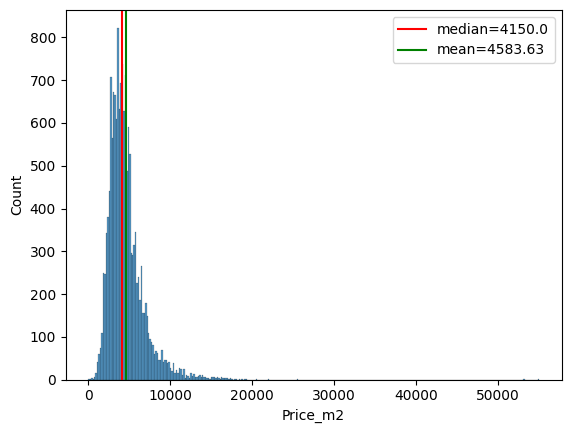

In [28]:
import seaborn as sns
sns.histplot(df_hab.Price_m2)
plt.axvline(df_hab.Price_m2.median(), c="r", label=f"median={df_hab.Price_m2.median()}")
plt.axvline(df_hab.Price_m2.mean(), c="g", label=f"mean={round(df_hab.Price_m2.mean(),2)}")
plt.legend();

In [7]:
df_hab.nom_barri.unique()

array(["la Dreta de l'Eixample", 'el Putxet i el Farró',
       'la Sagrada Família', 'Sant Antoni', 'Sant Gervasi - la Bonanova',
       'les Tres Torres', 'el Barri Gòtic', 'la Vila de Gràcia',
       'el Raval', "l'Antiga Esquerra de l'Eixample", 'Sarrià',
       'Sant Pere, Santa Caterina i la Ribera', 'les Corts',
       "el Camp de l'Arpa del Clot", 'la Marina de Port', 'el Fort Pienc',
       'el Poble-sec', "el Camp d'en Grassot i Gràcia Nova",
       "la Nova Esquerra de l'Eixample", 'Navas', 'el Carmel', 'Sants',
       "la Font d'en Fargues", 'Sant Martí de Provençals', 'el Poblenou',
       'la Maternitat i Sant Ramon', 'la Vila Olímpica del Poblenou',
       'Verdun', 'Diagonal Mar i el Front Marítim del Poblenou',
       'el Coll', 'la Trinitat Vella', 'la Salut', 'el Clot',
       'Vilapicina i la Torre Llobeta', 'Pedralbes', 'Sant Andreu',
       'Baró de Viver', 'Vallcarca i els Penitents',
       'Vallvidrera, el Tibidabo i les Planes', 'la Font de la Guatlla',
      

In [8]:
df_hab.Property_type.unique()

array(['FLAT', 'PENTHOUSE', 'GROUND_FLOOR', 'SINGLE_FAMILY_SEMI_DETACHED',
       'DUPLEX', 'PAIRED_HOUSE', 'LOFT', 'HOUSE', 'APARTMENT', 'STUDIO',
       'TRIPLEX'], dtype=object)

In [13]:
encoded_df.columns

Index(['Rooms', 'Bathrooms', 'Size_m2', 'Price_m2', 'nom_barri_Baró de Viver',
       'nom_barri_Can Baró', 'nom_barri_Can Peguera', 'nom_barri_Canyelles',
       'nom_barri_Ciutat Meridiana',
       'nom_barri_Diagonal Mar i el Front Marítim del Poblenou',
       'nom_barri_Horta', 'nom_barri_Hostafrancs', 'nom_barri_Montbau',
       'nom_barri_Navas', 'nom_barri_Pedralbes', 'nom_barri_Porta',
       'nom_barri_Provençals del Poblenou', 'nom_barri_Sant Andreu',
       'nom_barri_Sant Antoni', 'nom_barri_Sant Genís dels Agudells',
       'nom_barri_Sant Gervasi - la Bonanova',
       'nom_barri_Sant Martí de Provençals',
       'nom_barri_Sant Pere, Santa Caterina i la Ribera', 'nom_barri_Sants',
       'nom_barri_Sants - Badal', 'nom_barri_Sarrià', 'nom_barri_Torre Baró',
       'nom_barri_Vallbona', 'nom_barri_Vallcarca i els Penitents',
       'nom_barri_Vallvidrera, el Tibidabo i les Planes', 'nom_barri_Verdun',
       'nom_barri_Vilapicina i la Torre Llobeta', 'nom_barri_el Baix G